In [12]:
import re

In [13]:
COORDINATE_PATTERN = re.compile(r'(\d+), (\d+)')
filepath = 'data/day6.txt'

In [14]:
def get_coordinates(filepath, pattern=COORDINATE_PATTERN):
    with open(filepath) as file:
        for line in file.readlines():
            match = pattern.findall(line)[0]
            yield (int(match[0]), int(match[1]))

In [15]:
coordinates = list(get_coordinates(filepath))

In [16]:
def get_bounding_box(coordinates):
    x_min = min(coordinates, key=lambda x: x[0])[0]
    x_max = max(coordinates, key=lambda x: x[0])[0]
    y_min = min(coordinates, key=lambda x: x[1])[1]
    y_max = max(coordinates, key=lambda x: x[1])[1]
    return ((x_min, x_max), (y_min, y_max))

In [17]:
print("x={0[0][0]}...{0[0][1]}, y={0[1][0]}...{0[1][1]}".format(get_bounding_box(coordinates)))

x=46...357, y=40...354


In [18]:
# NOTE: Useless func cos all coordinates are inside
def filter_coordinates(coordinates, x_range, y_range):
    for coord in coordinates:
        if coord[0] >= x_range[0] and coord[0] <= x_range[1] and\
           coord[1] >= y_range[0] and coord[1] <= y_range[1]:
            yield coord

In [19]:
def get_grid_distances(coordinates):
    # an area that isnt infinite which contains the largest area
    # is inside the bounding box created by the 4 coordinates that create
    # a box that contains all the coordinates
    (x_min, x_max), (y_min, y_max) = get_bounding_box(coordinates)
    
    width = x_max-x_min+1
    height = y_max-y_min+1

    grid = [[None for _ in range(width)] for _ in range(height)]
    
    def get_manhattan_distance(coord_a, coord_b):
        return abs(coord_a[0]-coord_b[0]) + abs(coord_a[1]-coord_b[1])

    def replace_grid_cell(x, y, coord):
        x_pos = x_min+x
        y_pos = y_min+y
        dist = get_manhattan_distance(coord, (x_pos, y_pos))
        
        if grid[y][x] is None:
            grid[y][x] = (dist, [index])
        else:
            curr_min = grid[y][x][0]
            if dist == curr_min:
                grid[y][x][1].append(index)
            elif dist < curr_min:
                grid[y][x] = (dist, [index])
        
    for x in range(width):
        for y in range(height):
            for index, coord in enumerate(coordinates):
                replace_grid_cell(x, y, coord)
    
    return grid

In [20]:
grid_distances = get_grid_distances(coordinates)

In [21]:
def remove_shared_cells(grid):
    grid = [[col for col in row] for row in grid]
    height = len(grid)
    width = len(grid[0])
    for x in range(width):
        for y in range(height):
            cell = grid[y][x]
            if cell is not None:
                dist, coord_index = cell
                if len(coord_index) > 1:
                    grid[y][x] = None
                else:
                    grid[y][x] = coord_index[0]
    return grid

In [22]:
grid_without_shared = remove_shared_cells(grid_distances)

In [23]:
def get_area_count(grid):
    area_count = {}
    height = len(grid)
    width = len(grid[0])
    for x in range(width):
        for y in range(height):
            coord_index = grid[y][x]
            if coord_index is not None:
                if coord_index not in area_count:
                    area_count[coord_index] = 0
                area_count[coord_index] += 1
    return area_count

In [24]:
area_count = get_area_count(grid_without_shared)

In [25]:
# grid = grid without shared
# check if infinite by checking the border of the bounding box
def get_infinite_indexes(grid):
    infinite_indexes = {}
    height = len(grid)
    width = len(grid[0])
    for x in (0, width-1):
        for y in (0, height-1):
            coord_index = grid[y][x]
            if coord_index is not None:
                infinite_indexes[coord_index] = True
    
    return list(infinite_indexes.keys())

In [26]:
infinite_indexes = get_infinite_indexes(grid_without_shared)
print(infinite_indexes)
print(area_count)

[34, 3, 26, 6]
{0: 1660, 1: 1650, 2: 1313, 3: 1782, 4: 2044, 5: 1345, 6: 693, 7: 3256, 8: 554, 9: 3145, 10: 812, 11: 2634, 12: 2271, 13: 3128, 14: 2556, 15: 2721, 16: 2685, 17: 991, 18: 1523, 19: 2074, 20: 1594, 21: 777, 22: 728, 23: 1295, 24: 2282, 25: 1040, 26: 2998, 27: 1327, 28: 3476, 29: 2239, 30: 271, 31: 2021, 32: 796, 33: 2293, 34: 5246, 35: 1815, 36: 1003, 37: 805, 38: 1547, 39: 1896, 40: 3363, 41: 1580, 42: 3010, 43: 1121, 44: 1450, 45: 1355, 46: 2452, 47: 3882, 48: 958, 49: 1758}


In [27]:
area_count_without_inf = {index: area for index, area in area_count.items() if index not in infinite_indexes}
coord_index, max_area = max(area_count_without_inf.items(), key=lambda x: x[1])
print('Max area: {}'.format(max_area))

Max area: 3882


# Part 2

In [28]:
def get_sum_of_grid_distances(coordinates):
    # an area that isnt infinite which contains the largest area
    # is inside the bounding box created by the 
    (x_min, x_max), (y_min, y_max) = get_bounding_box(coordinates)
    
    width = x_max-x_min+1
    height = y_max-y_min+1

    grid = [[0 for _ in range(width)] for _ in range(height)]
    
    def get_manhattan_distance(coord_a, coord_b):
        return abs(coord_a[0]-coord_b[0]) + abs(coord_a[1]-coord_b[1])
    
    for x in range(width):
        for y in range(height):
            x_pos = x_min+x
            y_pos = y_min+y
            for index, coord in enumerate(coordinates):
                dist = get_manhattan_distance(coord, (x_pos, y_pos))
                grid[y][x] += dist
    return grid

In [29]:
sum_grid_distances = get_sum_of_grid_distances(coordinates)

In [30]:
sum_grid_distances[0][0]

14896

In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


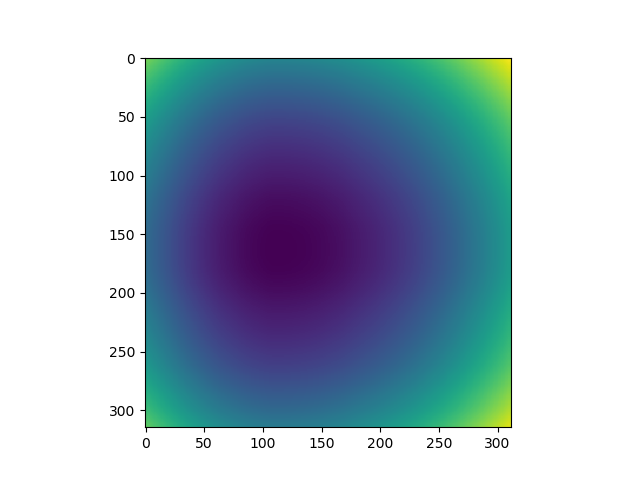

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(sum_grid_distances)

In [33]:
CUTOFF_DISTANCE = 10000

<IPython.core.display.Javascript object>


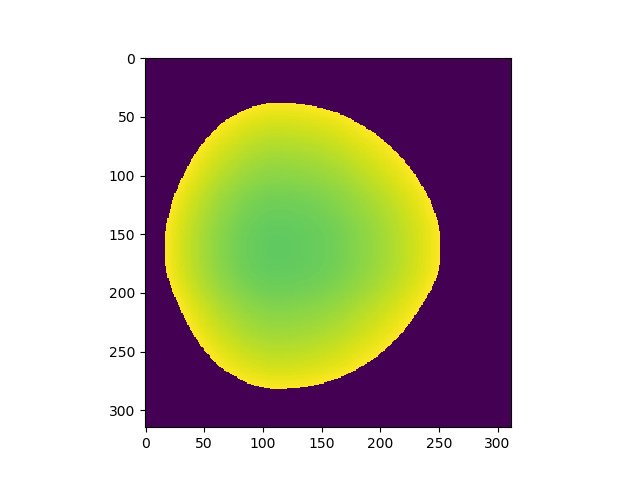

In [34]:
cutoff_sum_grid_distances = [[col if col < CUTOFF_DISTANCE else 0 for col in row] for row in sum_grid_distances]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(cutoff_sum_grid_distances)

In [35]:
# since the region is coherent, calculate
total_area = 0
for row in sum_grid_distances:
    for col in row:
        if col < CUTOFF_DISTANCE:
            total_area += 1
print('Total area: {}'.format(total_area))

Total area: 43852
